# Oscillations and bifurcations

Oscillatory or periodic behaviour is fundamental to biological systems.  You need to look no further than your own body to notice examples of periodic rhythms and patterns, such as the beating of our hearts, the inflation and deflation of our lungs, or the circadian cycle governing being asleep or awake, to name just a few.  For each of these processes, we can pinpoint a particular frequency and amplitude with which the oscillations occur.  This is in contrast with the Lotka-Volterra system where we observed the oscillations, in particular their amplitude, are instead highly dependent upon the initial conditions, with many closed orbits circling the centre fixed point.  We'll now examine the existence of isolated closed trajectories, or limit cycles, and study how to predict their frequency and amplitude under certain assumptions.  

Finally, we'll revist bifurcations in the context of multidimensional systems.  While we will see that the bifurcations we encountered in one-dimensional systems exist in a very similar way in the multidimensional context, new types of bifurcations can occur.  In particular, we'll examine the case of the (supercritical) Hopf bifurcation where upon the variation of a parameter, a stable fixed point becomes unstable and the new attractor is a stable limit cycle.  

At each step of the way, we'll explore models of biological phenomena that exhibit limit cycles, interpreting their role in the biological process that the model is meant to capture.

## Existence of closed orbits: Poincaré-Bendixson Theorem

We will begin our discussion by answering the question: how can we know if a closed orbit exists?  The answer to this question for 2D systems is provided by the *Poincaré-Bendixson Theorem* which we state here.

**Poincaré-Bendixson Theorem** Suppose that:
\begin{enumerate}
\item $R$ is a closed, bounded subset of the plane
\item $d\mathbf{x}/dt = \mathbf{f}(\mathbf{x})$ is a continuously differentiable vector field on an open set containing $R$
\item $R$ does not contain any fixed points
\item There exists a trajectory $C$ that is confined in $R$, meaning that it begins in $R$ and remains in $R$ for all future times.
\end{enumerate}
Then either $C$ is a closed orbit, or it spirals toward a closed orbit at $t \rightarrow \infty$.  

We won't prove this theorem, but we'll need to understand how to apply it to ascertain the existence of closed orbits.  In doing so, we need to ensure that each of the conditions described above is met.  While the first three can be easily satisfied or checked, the fourth condition normally requires a bit more effort.  

The usual approach is to ensure that $R$ is chosen such that it is a *trapping set*, meaning that the flow points inward along the boundary of $R$.  More specifically, if $\mathbf{n}(\mathbf{x})$ is the outward-pointing unit-vector along the boundary of $R$, $\partial R$, then $R$ will be a trapping set if $\mathbf{f}(\mathbf{x})\cdot \mathbf{n}(\mathbf{x}) < 0$ for all $\mathbf{x}\in \partial R$.  Constructing the trapping set ensures that all trajectories in $R$ are confined, not just one.  Provided that our trapping set does not contain a fixed point and the continuity conditions on $\mathbf{f}$ are satisfied, the Poincaré-Bendixson Theorem will guarantee that $R$ contains a closed orbit.

\begin{figure}
\includegraphics{trappingset.png}
\end{figure}

### More-realistic predator-prey system  

Previously, we observed several biologically unrealistic and mathematically undesirable properties of the Lotka-Volterra system.  Both of these deficiencies can be alleviated by using a more realistic predator-prey model that incorporates logistic growth and a nonlinear predation term,

\begin{align}
\frac{dN}{dt} = N\left(r\left(1 - \frac{N}{K}\right)-k\frac{P}{N+D}\right), \\
\frac{dP}{dt} = sP\left(1 - h\frac{P}{N}\right),
\end{align}

where $r$, $K$, $k$, $D$, $s$ and $h$ are positive constants.  We see that in the absence of predator population, $P(t)$, the prey populations size, $N(t)$, obeys logistic growth.  The predation term is similar to that used in the spruce budworm model in that for low $N$, predation will increase as the prey population size increases, but for large $N$ predation is largely independent of $N$.  The predator population is taken to follow a logistic-like equation, however, the carrying capacity is proportional to the size of the prey population, rather than simply being a constant.

In this example, we'll use the Poincaré-Bendixson Theorem to determine the conditions for which this model has a limit cycle.

#### Nondimensionalisation

We can nondimensionalise the system by introducing

\begin{align}
N = Ku, P = Kv/h, t = \tau/r
\end{align}

such that the system becomes

\begin{align}
\frac{du}{d\tau} = u(1 - u) - \frac{auv}{u + d} = f_1(u,v) \\
\frac{dv}{d\tau} = b v \left(1 - \frac{v}{u}\right) = f_2(u,v)
\end{align}

where $a = k/(hr)$, $b = s/r$, and $d = D/K$.  

#### Nullclines and fixed points 

Previously, we determined the fixed points and nullclines in order to obtain a general picture of the flow in phase space.  We'll now use them to aid us in constructing our trapping set.  

The nullclines are given by the curves

\begin{align}
0 = u(1 - u) - \frac{auv}{u + d} \\
0 = b v \left(1 - \frac{v}{u}\right)
\end{align}

From the first equation ($f_1 = 0$), we have that 

\begin{align}
v = (1 - u)(u+d)/a, 
\end{align}

while the second ($f_2 = 0$) yields $v = u$ and $v = 0$.  The nullclines can be plotted using the python cell below for different values of $a$, $b$ and $d$.

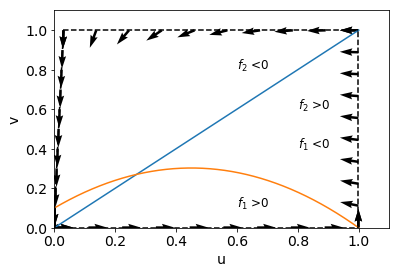

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#Set the parameter values
a = 1.0;
b = 0.2;
d = 0.1;

#Compute and plot the nullclines
u = np.linspace(0,1,1000)
v1 = u
v2 = (1 - u)*(u + d)/a

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("u")
plt.ylabel("v")
plt.plot(u,v1)
plt.plot(u,v2)
plt.ylim(0,1.1)
plt.xlim(0,1.1);
plt.text(0.6, 0.8, "$f_2$ <0", fontsize=12);
plt.text(0.8, 0.6, "$f_2$ >0", fontsize=12);
plt.text(0.8, 0.4, "$f_1$ <0", fontsize=12);
plt.text(0.6, 0.1, "$f_1$ >0", fontsize=12);


#Set the corners of the trapping set.
ub = 0.999
vb = ub
ua = ub
va = (1 - ua)*(ua + d)/a
ue = va;
ve = va;
ud = ue;
vd = (1 - ud)*(ud + d)/a
vc = vb
uc = 0.03

#Set the right-most boundary of the trapping set
u = np.linspace(ua,ub,10)
v = np.linspace(va,vb,10)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Set the lower boundary of the trapping set
u = np.linspace(ue,ua,10)
v = np.linspace(ve,va,10)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Set part of the left boundary
u = np.linspace(ue,ud,3)
v = np.linspace(ve,vd,3)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Set the upper boundary
u = np.linspace(uc,ub,10)
v = np.linspace(vc,vb,10)
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm)

#Find and plot the diagonal line
u = np.linspace(ud,uc,10)
m = (vc - vd)/(uc - ud)
k = vd - m*ud
v = m*u + k
f1 = u*(1-u) - a*u*v/(u+d)
f2 = b*v*(1 - v/u)
norm = (f1**2 + f2**2)**0.5
plt.plot(u,v,'k--')
plt.quiver(u,v,f1/norm,f2/norm);

Using the nullclines, we determine the regions where $f_1 > 0$ or $f_1 < 0$, and $f_2 > 0$ or $f_2 < 0$ and subsequently use this information to construct the outer region of the trapping set, $R$.  

Let's take, for example, the line $u = 1$ as a possible right most boundary of the trapping set.  Along this line, we know that the outward pointing normal will be $\mathbf{\hat u}$, the unit vector pointing to the right.  Thus, when considering $\mathbf{n}\cdot\mathbf{f} < 0$ is satisfied, for this boundary, we'll have to check if $\mathbf{\hat{u}}\cdot\mathbf{f}(1,v) = f_1(1,v) < 0$.  Since,

\begin{align}
f_1(1,v) = -\frac{av}{d + 1},
\end{align}

$a >0$, and $d > 0$, we have $f_1(1,v) < 0$ for $v >0$ and the condition for the trapping set is satisfied (at least for this part of the boundary!).  Notice that as long as the boundary that we are constructing is in the region $f_1 < 0$, we could have taken any line $u = k$, where $k$ is a constant.  In the Python cell above, we take $u = 0.999$

Similarly, we can take the line $v = 1$.  Here, $\mathbf{n} = \mathbf{\hat{v}}$, and we are therefore interested in determining if $f_2 < 0$ along this line.  For $v = 1$, we have 

\begin{align}
f_2(u,1) = b(1 - 1/u).  
\end{align}

Since, $b > 0$ and provided that $u<1$, we'll have $f_2 <0$ along this line. Note, that these line cut the nullclines in such a way that flow will be along the boundary, but this is admissible since $R$ is closed.  Again, provided we are in the region $f_2 < 0$, we can take any line $v = k$, where $k$ is a constant.

These and the three additional sections of the outer boundary of $R$ are plotted using the Python cell above.  The arrows along the lines indicate the direction of the vector $\mathbf{f}$ at the point where it is drawn.  Two of the addition sections are constructed in a very similar way using vertical or horizontal lines.  The final section requires a diagonal line as $f_1 < 0$ in this region of phase space.  This means a vertical line at this part of left boundary would not necessarily yield a trapping set.  Note that finding this diagonal line is a nontrivial task!   

So far, so good, but there is a slight problem -- the set that we constructed contains a fixed point!   To get rid of it we use a little trick.  We 'puncture' the set that we created by introducing an infinitesimally small circle drawn around the fixed point.  The next step is to guarantee that the flow is directed into $R$ along the edge of the infinitesimal hole that we introduced.  

Taking advantage of what we know about the stability of the fixed points, we can guarantee the flow will be inward provided that $Re(\lambda_i) > 0$ for $i = 1,2$, i.e. the fixed point is an unstable node or unstable spiral (note that a saddle does not apply!).  

First, let's find the precise values of $u$ and $v$ at the fixed point.  To do this, we first set $v = u$ and consider

\begin{align}
u = (1 - u)(u+d)/a
\end{align}

which yields

\begin{align}
u^* = \frac{(1-a-d) + \sqrt{(1-a-d)^2 + 4d}}{2}.
\end{align}

and $v^* = u^*$. 

To assess the stability of the fixed point, we proceed in the usual way by computing the Jacobian and evaluate it at the fixed point $(u^*,u^*)$.  This gives

\begin{align}
J(u^*,u^*) = \left[\begin{array}{cc}
u^*\left(\frac{au^*}{(u^* + d)^2} - 1 \right) & -\frac{au^*}{u^* + d} \\
b & -b
\end{array}\right]
\end{align}

where we have used the fact that $u^*(1-u^*) = au^*v^*/(u^* + d)$.  

Now we'd like to find under which conditions are real parts of both eigenvalues of this matrix greater than zero.  Rather than computing the eigenvalues directly, we recall their relationship to the trace and determinant of the matrix $J$.  Namely, we'll have that the $Re(\lambda_i) > 0$, for $i = 1,2$ if $\textrm{trace}(J) > 0$ and $\textrm{det}(J) > 0$.

For the determinant, one can show that

\begin{align}
\textrm{det}(J(u^*,u^*)) = \left(1 + \frac{ad}{(u^* + d)^2}\right)bu^*,
\end{align}

and therefore, $\textrm{det}(J(u^*,u^*)) > 0$.  From the condition that the trace be greater than zero, we have

\begin{align}
u^*\left(\frac{au^*}{(u* + d)^2} - 1 \right) > b.
\end{align}

As $u^*$ depends only on the parameters $a$ and $d$, the equation 

\begin{align}
b(a,d) = u^*\left(\frac{au^*}{(u* + d)^2} - 1 \right)
\end{align}

defines a surface in $(a,d,b)$-space that is the boundary between parameter values that lead to stable fixed points and those that result in unstable fixed points.  This surface is plotted below with the region below the surface providing the parameter values for which the fixed point is unstable (Note: we must also have $b > 0$.)

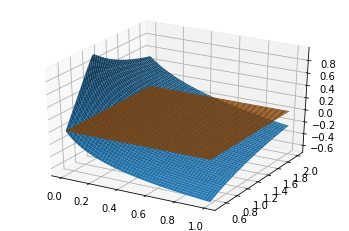

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#standard parameter values a = 1, b = 1, d = 0.1

a = np.linspace(0.5,2,200)
d = np.linspace(0.0001,1.0,200)
dmat,amat = np.meshgrid(d,a)
onemamd = 1 - amat - dmat
ustar = 0.5*(onemamd + (onemamd**2 + 4*dmat)**0.5)
bmat = ustar*(amat*ustar/((ustar + dmat)**2) - 1)
b2 = 0*amat;
ax.plot_surface(dmat,amat,bmat,vmin = 0);
ax.plot_surface(dmat,amat,b2);

With parameter values taken from below the blue surface, we've satisfied all conditions for Poincaré-Bendixson theorem to hold and we can be guaranteed of the existence of a closed orbit in our trapping region.  So what does the solution look like when this occurs?  The Python cell below solves the system numerically and shows the trajectories in phase space approaching the limit cycle.  The second figure plots $u$ and $v$ as a function of time.  

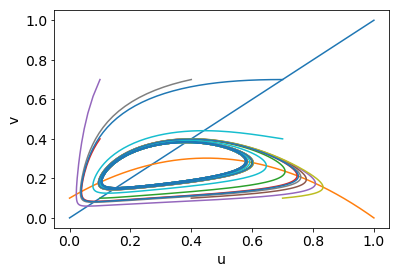

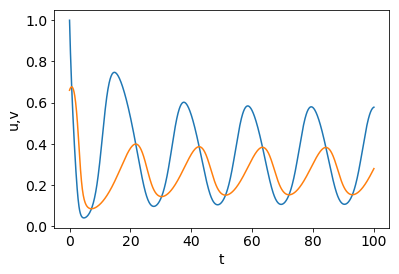

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint


a = 1
b = 0.2
d = 0.1

u = np.linspace(0,1,1000)
v1 = u
v2 = (1 - u)*(u + d)/a
plt.figure(0)
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("u")
plt.ylabel("v")
plt.plot(u,v1)
plt.plot(u,v2)

def du_dt(u, t):
    return [u[0]*(1 - u[0]) - a*u[0]*u[1]/(u[0] + d), b*u[1]*(1 - u[1]/u[0])]

ts = np.linspace(0, 100, 1000)
ics = np.arange(0.1, 0.9, 0.3)
for i in ics:
    for j in ics:
        u0 = [i, j]
        us = odeint(du_dt, u0, ts)
        pop1 = us[:,0]
        pop2 = us[:,1]
        plt.figure(0)
        plt.plot(pop1,pop2);
        
plt.xlabel("u");
plt.ylabel("v");

u0 = [1.0, 0.66]
us = odeint(du_dt, u0, ts)
pop1 = us[:,0]
pop2 = us[:,1]
plt.figure(1)
plt.plot(ts,pop1)
plt.plot(ts,pop2);
plt.xlabel("t");
plt.ylabel("u,v");


You can see immediately the qualitative difference between the outcome of this model and that of the Lotka-Volterra system.  For this set of parameter values, all initial conditions approach a single closed orbit in phase space -- the limit cycle.  This indicates that there is a *natural* oscillatory behaviour of the system that is independent of the intial conditions.  Perhaps this is what Volterra was after!  It's worth running the cell with different parameter values to confirm the results of our analysis.  

One interesting mathematical aspect to point out is that in order for our limit cycle to exist, the fixed point needed to be an unstable node or unstable spiral and we found the parameter values for which this occurs.  We can imagine then allowing the parameters to vary and cross over from the region where the fixed point is stable to where it is unstable.  When we cross the boundary the change in stability indicates that a bifurcation has occured, though this is not like any we have seen before.  At the bifurcation, a stable limit cycle emerges from the fixed point.  This is known as a *supercritical Hopf bifurcation* which we'll soon examine in more detail.   

## Relaxation oscillators

In our example, the Poincaré-Bendixson theorem proved itself useful in helping us determine whether a closed orbit exists or not, but cannot do much more than that, other than generally indicate where in phase space an orbit might be.  Typically, we'd like to be able to estimate the radius and shape of the orbit, as well as its period -- the time required for the solution to go once around orbit.  We'll see how we can ascertain these details under certain conditions or assumptions.  

The first case that we'll consider is that of a *relaxation oscillator*.  Let's recall for the moment something that we encountered when studying bifurcations in one-dimensional systems.  We saw that certain systems, such as the spruce budworm model, can exhibit hysteresis, where the continuous variation of a parameter caused the fixed point to suddenly 'jump.' In the case of the spruce budworm, this entailed suddenly jumping from the refuge population level to the outbreak level as we increased the parameter $R$.  If we then allowed the parameter to return to its original value, the fixed point did not return to its original location.  Recall that for the system to exhibit hysteresis, we needed to have a region of bistability where two stable fixed points exist for a range of parameter values.

Now suppose we had a one-dimensional system 

\begin{align}
\frac{du}{dt} &= f_1(u;v) 
\end{align}

that exihibits bistability for a range of parameter $v$.  Now's let's turn the parameter into another variable and consider the system

\begin{align}
\frac{du}{dt} &= f_1(u, v) \\
\frac{dv}{dt} &= \epsilon f_2(u,v )
\end{align}

If $0 < \epsilon \ll 1$, then we have that $dv/dt \approx 0$ and we can consider it constant while $u$ evolves in time and reaches its steady-state value based on $f_1(u,v) = 0$ for fixed $v$.  Thus, the solution will follow the nullcline $f_1(u,v) = 0$.  The solution moves along the nullcline until it reaches a local maximum or minimum, at which point it leaves the nullcline and moves rapidly across phase space at a nearly constant value of $v$.  The point at which it leaves the nullcline would correspond to the bifurcation point if $v$ were a parameter in the one-dimensional system.  When its path reaches the nullcline, it moves along it again and the process repeats.  This is depicted in the sketch below.

\begin{figure}
\includegraphics{relaxationoscillator.png}
\end{figure}

Something else to notice is that we cannot completely ignore what is happening with $f_2(u,v)$.  This will give us information about how $v$ varies over a longer timescale, and accordingly which direction the solution moves along the $f_1(u,v) = 0$ nullcline.    

Since $u$ evolves rapidly, we refer to it as the *fast variable*, while $v$ is called the *slow variable*.  Does this look familiar?  We encountered fast and slow variables previously when studying the Michaelis-Menten model of enzyme dynamics (can you identify the fast and slow variables in this case?).  The Michaelis-Menten model, however, does not emit oscillatory solutions since the one-dimensional system for the fast variable does not exhibit hysteresis with respect to variations of the slow variable, i.e. the corresponding nullcline $f_1(u,v) = 0$ does not have the right shape.

Let's see how this plays out in an important model of the electrical signals along neurons (nerve cells), the Fitzhugh-Nagumo model.

### Fitzhugh-Nagumo model

Before getting into the specifics of the Fitzhugh-Nagumo model, it must be noted that this model is a model of another model, the Hodgkin-Huxley model (the Huxley of note here is Andrew Huxley, grandson of our building's namesake).  Hodgkin and Huxley measured the current across the membrane surrounding the axon (the slender appendage eminating from a nerve cell along which electrical signal propagate) due to the passage of different ions through its membrane.  In particular, they measured how membrane permeability differs for the different ions and how all permeabilities (ion conductances) depend on the voltage across the membrane.  Hodgkin and Huxley were awarded the Nobel Prize for this work and developed four-dimensional system of equations based on their measurements. Unfortunately, the resulting system is rather complex leading researchers to develop simpler models that capture the key features of neuron firing, but are more amenable to analysis.  This is where the Fitzhugh-Nagumo models arrives.

The (dimensionless) Fitzhugh-Nagumo model is

\begin{align}
\frac{dv}{dt} &= f(v) - w + I_a \\
\frac{dw}{dt} &= bv - \gamma w
\end{align}

where $f(v) = v(a - v)(v - 1)$, the variable $v$ is meant to described the dynamics of the membrane voltage and $w$ represents the effect of ion conductance.  Additionally, we have $0 < a < 1$ and $b$ and $\gamma$ are positive constants, while $I_a$ is a current that can be applied across the membrane.

A nice feature of this model is the diversity of the kinds of solutions that one can obtain (that is code for there are some nice bifurcations to observe), including relaxation oscillations.  To obtain relaxation oscillations with the Fitzhugh-Nagumo model, we'll take $b = \gamma << 1$, such that $d w/dt \approx 0$ and consequently, $v$ will be the fast variable, while $w$ will be the slow variable.  Additionally, for relaxation oscillations to occur, we'll need to set the $I_a$ to ensure that at the fixed point we'll have $df/dv > 0$.  Such a case is plotted below using the python cell, taking $a = 0.05$, $b = \gamma = 0.001$, and $I_a = 0.25$.  

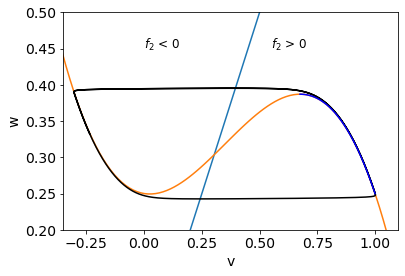

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.integrate import odeint

#Set the parameter values
a = 0.05
b = 0.001
gam = b
Ia = 0.25

#Compute the nullclines
v = np.linspace(-0.5,1.1,100)
w1 = v
fv = v*(a - v)*(v - 1)
w2 = fv + Ia

#Plot the nullclines
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("v")
plt.ylabel("w")
plt.plot(v,w1)
plt.plot(v,w2)
plt.ylim(0.2,0.5)
plt.xlim(-0.35,1.1);

plt.text(0.0, 0.45, "$f_2$ < 0", fontsize=12);
plt.text(0.55, 0.45, "$f_2$ > 0", fontsize=12);

#Compute and plot numerical solution to the system
def du_dt(u, t):
    return [u[0]*(a - u[0])*(u[0] - 1) - u[1] + Ia, b*u[0] - gam*u[1]]

ts = np.linspace(0, 1000, 10000)
u0 = [1, Ia]
us = odeint(du_dt, u0, ts)
vvec = us[:,0]
wvec = us[:,1]
plt.figure(1)
plt.plot(vvec,wvec,'k-')
plt.xlabel("v");
plt.ylabel("w");

#Plot section of nullcline used to compute the period
vp = 2/3 + a/6 
Nv = 1000
vtest = np.linspace(1, vp, Nv)
wtest = vtest*(a - vtest)*(vtest - 1) + Ia
plt.plot(vtest,wtest,'b-');

For this set of parameters, since $b = \gamma \ll 1$, the solution will evolve more or less along the nullcline given by $f_1(v,w) = 0$. Since we have $f_2 < 0$ to the left and above the nullcline $f_2(v,w) = 0$, the solution will move downward along nullcline $f_1(v,w) = 0$ in this region until it comes close to the local minimum $df/dv = 0$ at $v \approx 0$.  At this point, the solution moves rapidly to the right across phase space to again meet the nullcline $v \approx 1$.  Since here $f_2 > 0$, we will move up the curve to the local maximum, at which point the solution will move rapidly to the left to meet the nullcline at $v \approx -0.3$ and the process repeats, completing the cycle.  This behaviour is confirmed by the numerical solution (black curve) shown in the plot above.  It's interesting to see how the orbit changes shape as you increase the value of $b$ and $\gamma$ -- try it!

#### Period of the orbit

In addition to being able predict the shape of the limit cycle in phase space for a relaxation oscillator, we are also able to approximate the period of the orbit.  Recall that for a relaxation oscillator, there are the fast and slow variables, here, $v$ and $w$, respectively.  The equation for the fast variable tells us which nullcline the solution will move along, while the equation for the slow variable tells us the direction the solution will move.  

As the evolution is governed by the change in the slow variable, to approximate the period of the orbit, we only need to consider places where $w$ is changing.  Thus, since the 'jumps' in the solution that occur near the local maxima and minima of the nullcline have $w \approx \textrm{constant}$, they can be considered to occur instantaneously and only motion along the nullcline will contribute to the time required to make one orbit. 

With the above in mind, we first determine the points in $vw$-plane where the local minima and maxima of the nullcline occur.  To find these points, we must consider $df/dv = -3v^2 + 2(1+a) - a = 0$, which yields,

\begin{align}
v_{\pm} = \frac{1}{3}\left((1+a) \pm \sqrt{1 - a + a^2}\right).
\end{align}

To get a better idea of these values, if we assume that $a \ll 1$, we'll have $v_+ = 2/3 + a/6 + O(a^2)$ and $v_- = a/2 + O(a^2)$, indicating that at least in this limit, the roots are real.  For $v_-$, we can find the corresponding value of $w_-$, by evaluating our expression for the nullcline, $w_- = f(v_-) + I_a$.  In the limit $a \ll 1$, we'll have $w_- = I_a + O(a^2)$.  Taking the line $w = w_-$, we find where it will intersect the nullcline again by considering $w_- = f(v_*) + I_a$.  In the $a \ll 1$, the values is $v_* = 1 + O(a^2)$.  Therefore, what we'd like to compute is the time required for the solution to move from $v = v_*$ to $v = v_+$ along the nullcline.  This approximate path is the blue curve shown in the plot above containing the nullclines and solution.  We now can find its contribution to the period.  

By integrating the differential equation for the slow variable, we have 

\begin{align}
\int_{w(v_*)}^{w(v_+)}\frac{dw}{v-w} = \int_{0}^{T_1} \gamma dt
\end{align}

Since along the nullcline $w = f(v) + I_a$ and therefore $dw/dv = df/dv$, we can rewrite the integral on the lefthand side as 

\begin{align}
\int_{v_*}^{v_+} \frac{1}{v - f(v) - I_a}\frac{dw}{dv}dv = \int_1^{v_+} \frac{-3v^2 + 2(a+1)v - a}{v - f(v) - I_a}dv
\end{align}

and thus the time required to move along this part of the orbit is

\begin{align}
T_1 = \frac{1}{\gamma}\int_1^{v_+}\frac{-3v^2 +2(a+1)v - a}{v - f(v) - I_a}dv.
\end{align}

Similarly, we can compute the contribution to the period from the other part of the orbit as

\begin{align}
T_2 = \frac{1}{\gamma}\int_{v_+ - 1 + a/2}^{v_-}\frac{-3v^2 +2(a+1)v - a}{v - f(v) - I_a}dv,
\end{align}

giving the total period as $T = T_1 + T_2$.

While these expressions might be a bit unwieldy to be evaluated analytically, we can apply basic quadrature to obtain a numerical value as is done in the Python cell below.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Set the parameters
a = 0.05
b = 0.001
gam = b
Ia = 0.25

#Integrate numerically to obtain T_1
vp = 2/3 + a/6
vm = a/2
vstarstar = vp - 1 + vm

Nv = 1000
v = np.linspace(1, vp, Nv)
dv = (1 - vp)/Nv
fnum = -3*v**2 + 2*(a + 1)*v - a
fden = v - v*(a - v)*(v - 1) - Ia
f = fnum/fden
Integral1 = sum(f)*dv
T1 = -Integral1/gam

#Integrate numerically to obtain T_2
Nv = 1000
v = np.linspace(vstarstar, vm, Nv)
dv = (vm - vstarstar)/Nv
fnum = -3*v**2 + 2*(a + 1)*v - a
fden = v - v*(a - v)*(v - 1) - Ia
f = fnum/fden
Integral2 = sum(f)*dv
T2 = Integral2/gam
T = T1 + T2
print("The approximate period of the limit cycle is", T)


The approximate period of the limit cycle is 528.396812249234
